# Objective
This project is an exercise in Predictive Modeling that can be conducted on any tabular dataset employing Machine Learning 
Algorithms, in this instance, applied to a tabular dataset for Diamond Price Prediction based on certain characteristics or features. 

# Data
<br>A dataset containing the prices and other features of almost 54,000 diamonds available in Kaggle. <br>

https://www.kaggle.com/shivam2503/diamonds
    
<br>Feature Information: A data frame with 53,940 rows and 10 variables:<br>       
- **price**: price in US dollars<br>
<br>
- **carat**: weight of the diamond<br>
<br>
- **cut**: quality of the cut (Fair, Good, Very Good, Premium, Ideal)<br>
<br>
- **color**: diamond colour, from J (worst) to D (best)<br>
<br>
- **clarity**: a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))<br>
<br>
- **x**: length in mm<br>
<br>
- **y**: width in mm<br>
<br>
- **z**: depth in mm<br>
<br>
- **depth**: total depth percentage = z / mean(x, y) = 2 * z / (x + y)<br>
<br>
- **table**: width of top of diamond relative to widest point<br>


# Models

- Multiple Linear Regression
- Lasso Regression
- KNN Regression

# Evaluation

The evaluation metrics in consideration are the following:
    
- Root Mean Squared Error

- Mean Absolute Error

- R-squared 


# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
get_ipython().run_line_magic('matplotlib', 'inline')

In [2]:
# temporary warnings suppresion 
from pandas.core.common import SettingWithCopyWarning
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)
warnings.filterwarnings('ignore')

# Import data

In [3]:
data_path = '../input/diamonds/diamonds.csv'

In [4]:
diamonds = pd.read_csv(data_path)
diamonds.shape

(53940, 11)

In [5]:
diamonds.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


# Data Preprocessing

#### summary statistics for numerical columns

In [6]:
diamonds.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


#### check the values of x equal to zero

In [7]:
diamonds.loc[diamonds['x']==0]

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
11182,11183,1.07,Ideal,F,SI2,61.6,56.0,4954,0.0,6.62,0.0
11963,11964,1.00,Very Good,H,VS2,63.3,53.0,5139,0.0,0.00,0.0
15951,15952,1.14,Fair,G,VS1,57.5,67.0,6381,0.0,0.00,0.0
24520,24521,1.56,Ideal,G,VS2,62.2,54.0,12800,0.0,0.00,0.0
26243,26244,1.20,Premium,D,VVS1,62.1,59.0,15686,0.0,0.00,0.0
27429,27430,2.25,Premium,H,SI2,62.8,59.0,18034,0.0,0.00,0.0
49556,49557,0.71,Good,F,SI2,64.1,60.0,2130,0.0,0.00,0.0
49557,49558,0.71,Good,F,SI2,64.1,60.0,2130,0.0,0.00,0.0


In [8]:
diamonds = diamonds.loc[(diamonds['x']>0) | (diamonds['y']>0)]

In [9]:
diamonds.loc[11182]

Unnamed: 0    11183
carat          1.07
cut           Ideal
color             F
clarity         SI2
depth          61.6
table            56
price          4954
x                 0
y              6.62
z                 0
Name: 11182, dtype: object

In [10]:
diamonds.loc[11182, 'x'] = diamonds['x'].median()

In [11]:
diamonds.loc[diamonds['x']==0].shape

(0, 11)

In [12]:
diamonds.loc[diamonds['y']==0]

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z


In [13]:
diamonds.loc[diamonds['z']==0]

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
2207,2208,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0
2314,2315,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.0
4791,4792,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0
5471,5472,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0
10167,10168,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.0
11182,11183,1.07,Ideal,F,SI2,61.6,56.0,4954,5.70,6.62,0.0
13601,13602,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.0
24394,24395,2.18,Premium,H,SI2,59.4,61.0,12631,8.49,8.45,0.0
26123,26124,2.25,Premium,I,SI1,61.3,58.0,15397,8.52,8.42,0.0
27112,27113,2.20,Premium,H,SI1,61.2,59.0,17265,8.42,8.37,0.0


In [14]:
diamonds.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53933.000000,53933.000000,53933.000000,53933.000000,53933.000000,53933.000000,53933.000000,53933.000000
mean,26970.195316,0.797884,61.749333,57.457002,3932.155026,5.732007,5.735270,3.539193
std,15571.473740,0.473983,1.432501,2.234052,3988.700283,1.119660,1.140339,0.704592
min,1.000000,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,0.000000
25%,13485.000000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26971.000000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.000000,1.040000,62.500000,59.000000,5324.000000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [15]:
diamonds.loc[(diamonds['y'] > 30) | (diamonds['z'] > 30)]

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
24067,24068,2.00,Premium,H,SI2,58.9,57.0,12210,8.09,58.90,8.06
48410,48411,0.51,Very Good,E,VS1,61.8,54.7,1970,5.12,5.15,31.80
49189,49190,0.51,Ideal,E,VS1,61.8,55.0,2075,5.15,31.80,5.12


In [16]:
diamonds = diamonds.loc[~((diamonds['y'] > 30) | (diamonds['z'] > 30))]

In [17]:
diamonds.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53930.000000,53930.000000,53930.000000,53930.000000,53930.000000,53930.000000,53930.000000,53930.000000
mean,26969.439551,0.797873,61.749384,57.457107,3932.072353,5.731985,5.733812,3.538556
std,15571.334134,0.473965,1.432488,2.234057,3988.634982,1.119639,1.111498,0.693716
min,1.000000,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,0.000000
25%,13484.250000,0.400000,61.000000,56.000000,949.250000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40453.750000,1.040000,62.500000,59.000000,5324.000000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,10.540000,6.980000


#### one-hot encoding with pandas

In [18]:
pd.get_dummies(diamonds['cut'], prefix='cut').head()

,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good
0,0,0,1,0,0
1,0,0,0,1,0
2,0,1,0,0,0
3,0,0,0,1,0
4,0,1,0,0,0


In [19]:
pd.get_dummies(diamonds['cut'], prefix='cut', drop_first=True).head()

,cut_Good,cut_Ideal,cut_Premium,cut_Very Good
0,0,1,0,0
1,0,0,1,0
2,1,0,0,0
3,0,0,1,0
4,1,0,0,0


#### one-hot encoding for categorical features

In [20]:
diamonds = pd.concat([diamonds, pd.get_dummies(diamonds['cut'], prefix='cut', drop_first=True)], axis=1)
diamonds = pd.concat([diamonds, pd.get_dummies(diamonds['color'], prefix='color', drop_first=True)], axis=1)
diamonds = pd.concat([diamonds, pd.get_dummies(diamonds['clarity'], prefix='clarity', drop_first=True)], axis=1)

# Exploratory Data Analysis and Data Visualization

### Univariate EDA

In [21]:
diamonds = diamonds.loc[(diamonds['x']>0) | (diamonds['y']>0)]
diamonds.loc[11182, 'x'] = diamonds['x'].median()
diamonds.loc[11182, 'z'] = diamonds['z'].median()
diamonds = diamonds.loc[~((diamonds['y'] > 30) | (diamonds['z'] > 30))]
diamonds = pd.concat([diamonds, pd.get_dummies(diamonds['cut'], prefix='cut', drop_first=True)], axis=1)
diamonds = pd.concat([diamonds, pd.get_dummies(diamonds['color'], prefix='color', drop_first=True)], axis=1)
diamonds = pd.concat([diamonds, pd.get_dummies(diamonds['clarity'], prefix='clarity', drop_first=True)], axis=1)

In [22]:
numerical_features = ['price', 'carat', 'depth', 'table', 'x', 'y', 'z']
categorical_features = ['cut', 'color', 'clarity']

### Univariate EDA for categorical features

           count  percent
Ideal      21549     40.0
Premium    13788     25.6
Very Good  12080     22.4
Good        4904      9.1
Fair        1609      3.0


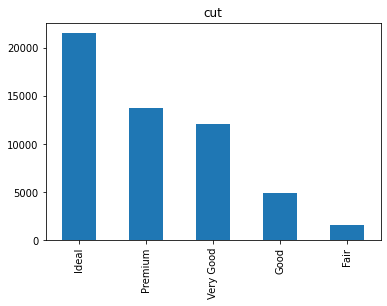

In [23]:
feature = categorical_features[0]
count = diamonds[feature].value_counts()
percent = 100*diamonds[feature].value_counts(normalize=True)
df = pd.DataFrame({'count':count, 'percent':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

   count  percent
G  11290     20.9
E   9795     18.2
F   9540     17.7
H   8301     15.4
D   6774     12.6
I   5422     10.1
J   2808      5.2


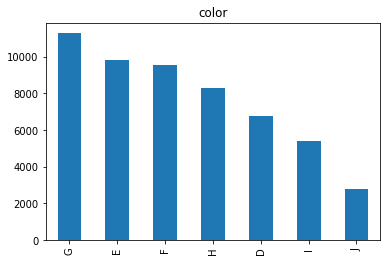

In [24]:
feature = categorical_features[1]
count = diamonds[feature].value_counts()
percent = 100*diamonds[feature].value_counts(normalize=True)
df = pd.DataFrame({'count':count, 'percent':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

      count  percent
SI1   13065     24.2
VS2   12256     22.7
SI2    9190     17.0
VS1    8168     15.1
VVS2   5066      9.4
VVS1   3654      6.8
IF     1790      3.3
I1      741      1.4


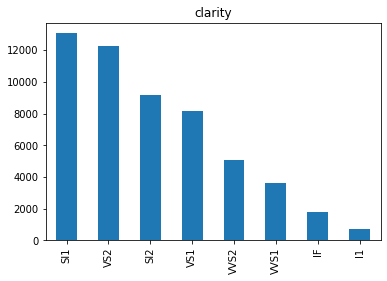

In [25]:
feature = categorical_features[2]
count = diamonds[feature].value_counts()
percent = 100*diamonds[feature].value_counts(normalize=True)
df = pd.DataFrame({'count':count, 'percent':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

In [26]:
def desc_cat_feature(feature_name, edgecolor='k', **kwargs):
    fig, ax = plt.subplots(figsize=(8,4))
    diamonds[feature_name].hist(bins=bins, edgecolor=edgecolor, ax=ax, **kwargs)
    ax.set_title(feature_name, size=15)
    plt.figtext(1,0.15, diamonds[feature_name].describe().round(2), size=17)

## Bivariate EDA

### Two numerical features

#### The scatter plot

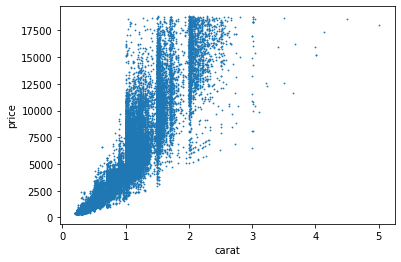

In [27]:
diamonds.plot.scatter(x='carat', y='price', s=0.6);

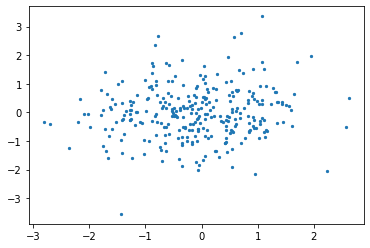

In [28]:
r1 = np.random.normal(size=300)
r2 = np.random.normal(size=300)
plt.scatter(r1, r2, s=5);

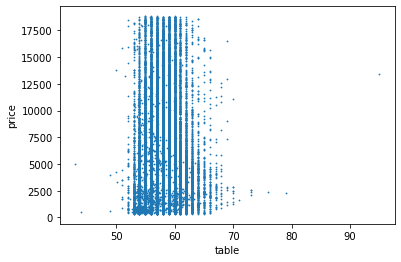

In [29]:
diamonds.plot.scatter(x='table', y='price', s=0.6);

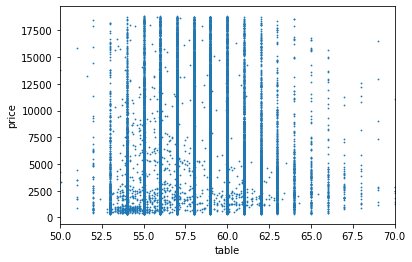

In [30]:
diamonds.plot.scatter(x='table', y='price', s=0.6, xlim=(50,70));

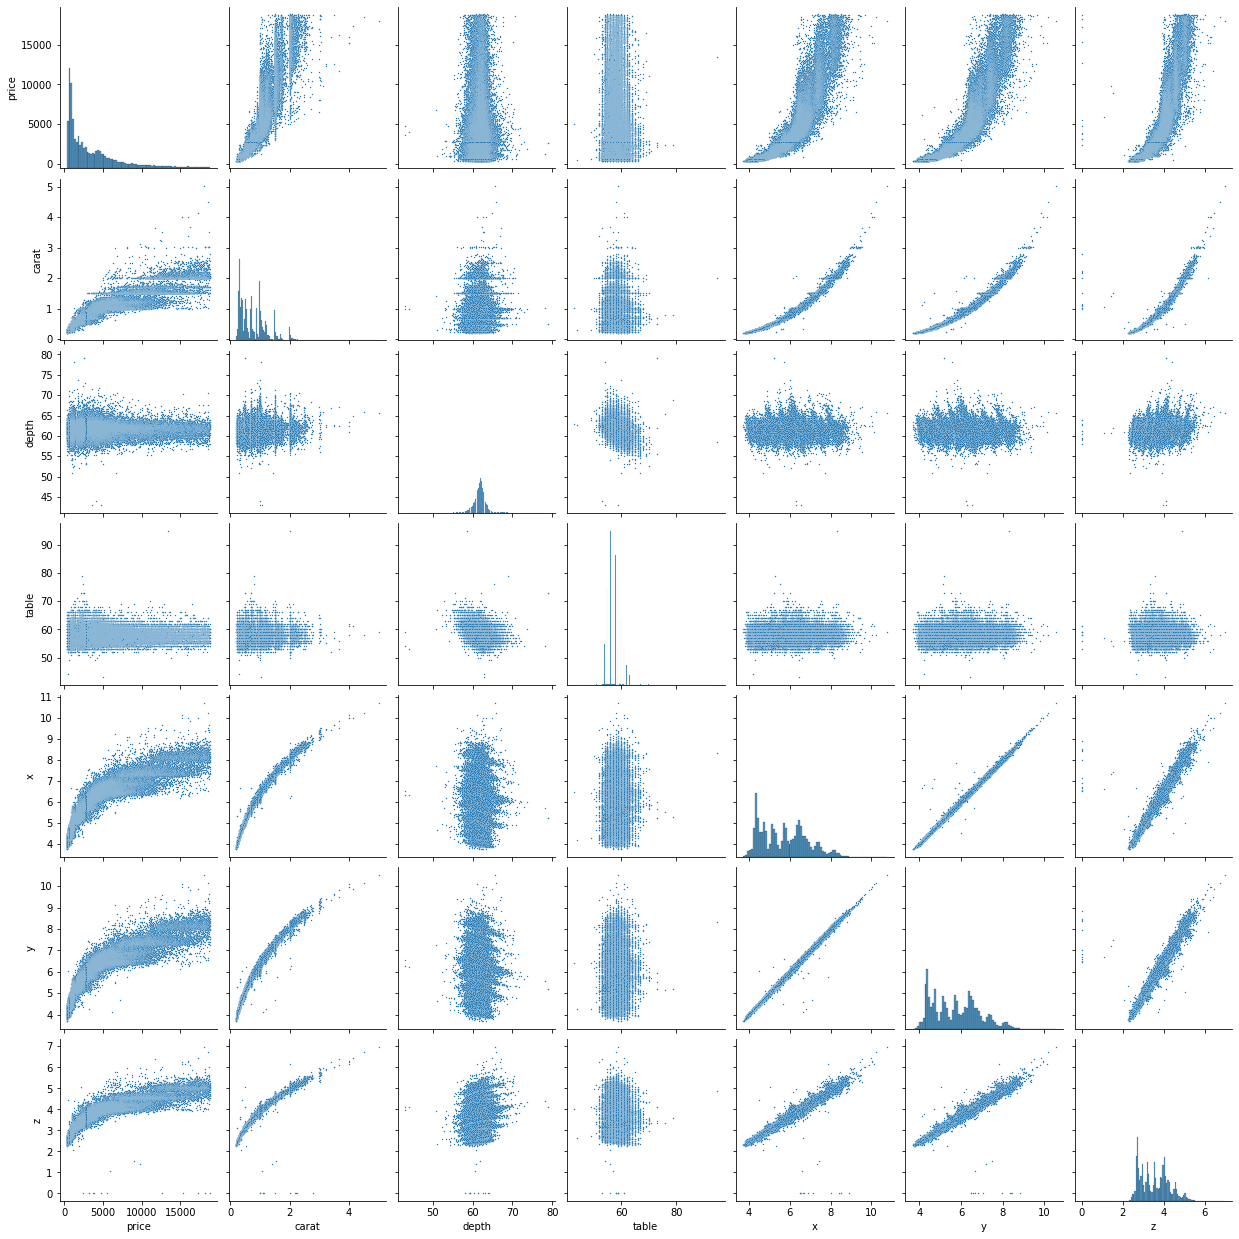

In [31]:
sns.pairplot(diamonds[numerical_features], plot_kws={"s": 2});

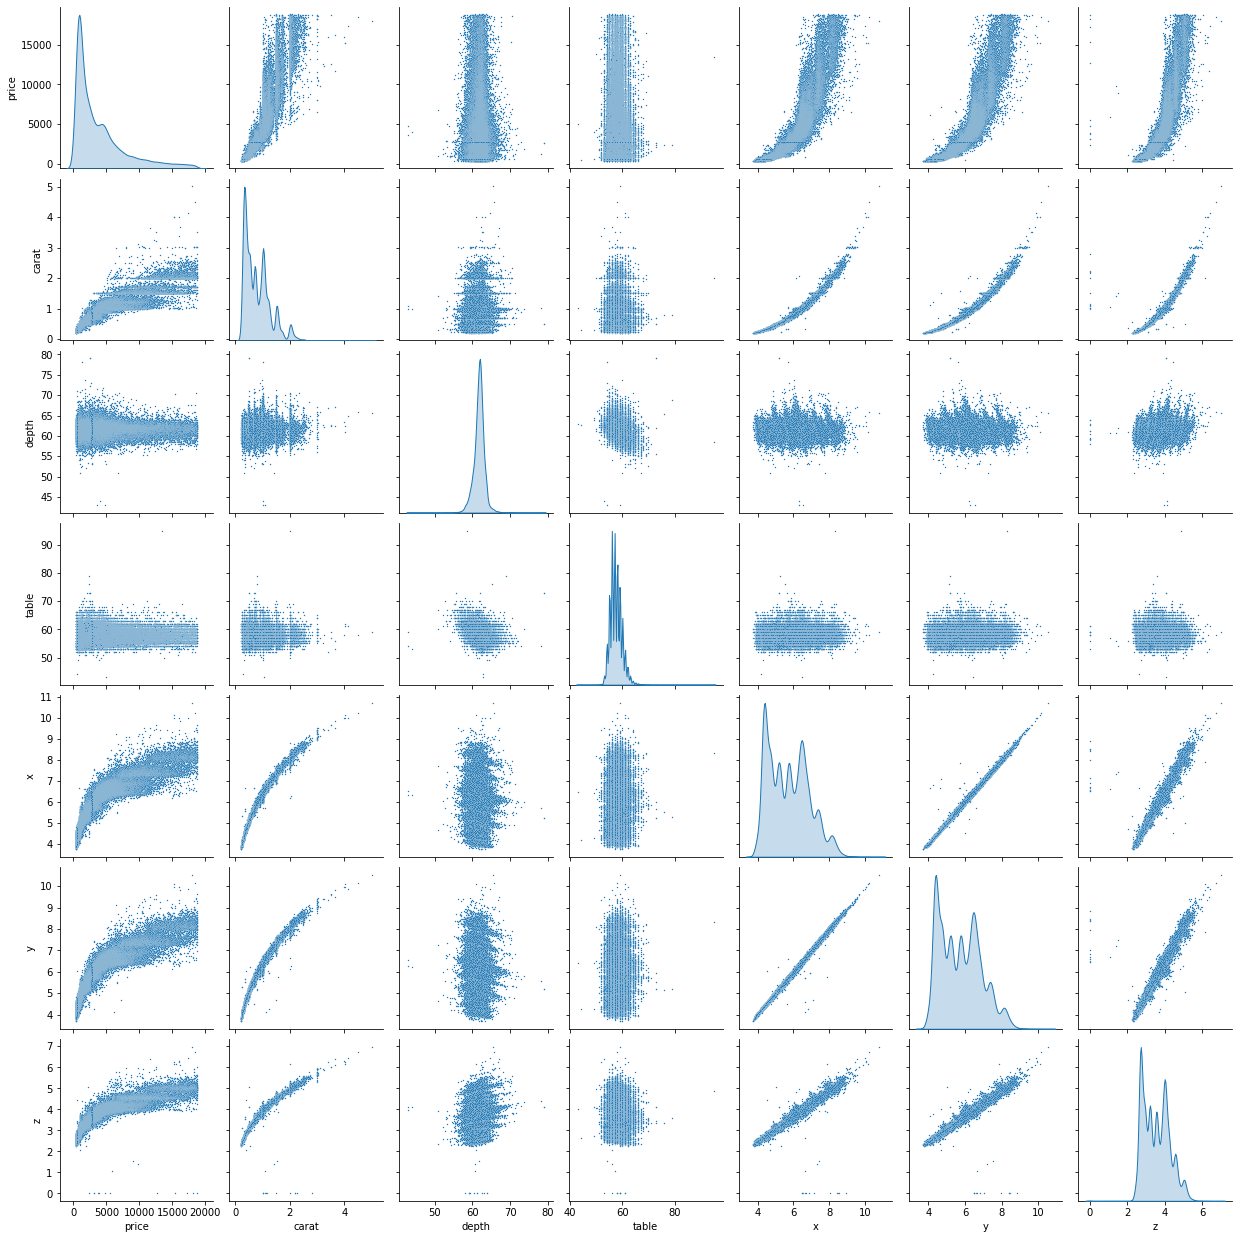

In [32]:
sns.pairplot(diamonds[numerical_features], plot_kws={"s": 2}, diag_kind='kde');

In [33]:
diamonds[numerical_features].corr()

,price,carat,depth,table,x,y,z
price,1.000000,0.921603,-0.010595,0.127157,0.887216,0.888810,0.877666
carat,0.921603,1.000000,0.028317,0.181650,0.977761,0.976844,0.971193
depth,-0.010595,0.028317,1.000000,-0.295722,-0.025020,-0.028151,0.097071
table,0.127157,0.181650,-0.295722,1.000000,0.196129,0.189964,0.154988
x,0.887216,0.977761,-0.025020,0.196129,1.000000,0.998652,0.986139
y,0.888810,0.976844,-0.028151,0.189964,0.998652,1.000000,0.985851
z,0.877666,0.971193,0.097071,0.154988,0.986139,0.985851,1.000000


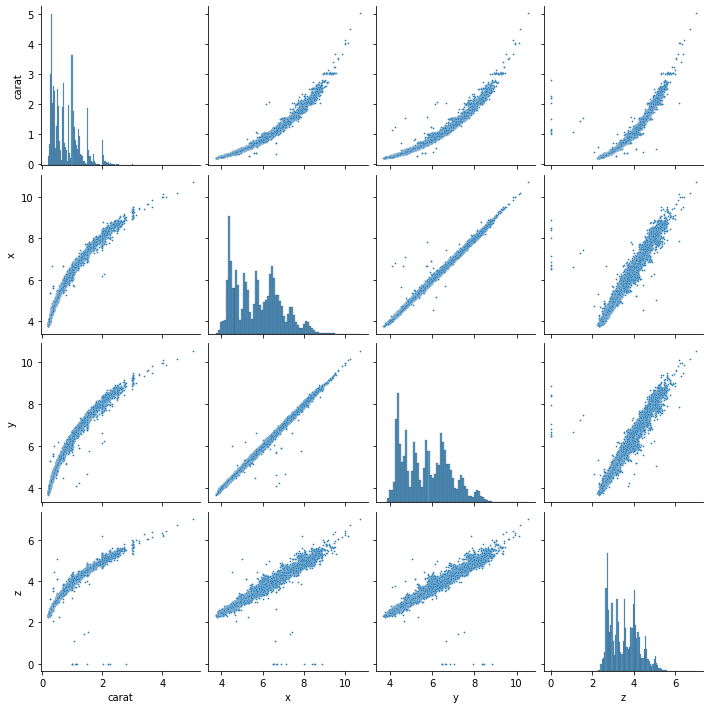

In [34]:
dim_features = diamonds[['carat','x','y','z']]
sns.pairplot(dim_features,plot_kws={"s": 3});

In [35]:
dim_features.corr()

,carat,x,y,z
carat,1.000000,0.977761,0.976844,0.971193
x,0.977761,1.000000,0.998652,0.986139
y,0.976844,0.998652,1.000000,0.985851
z,0.971193,0.986139,0.985851,1.000000


### Two categorical features

In [36]:
pd.crosstab(diamonds['cut'], diamonds['color'])  

color,D,E,F,G,H,I,J
cut,,,,,,,
Fair,163,224,312,313,303,175,119
Good,662,933,907,871,702,522,307
Ideal,2834,3902,3826,4883,3115,2093,896
Premium,1602,2337,2331,2924,2358,1428,808
Very Good,1513,2399,2164,2299,1823,1204,678


In [37]:
ct = pd.crosstab(diamonds['cut'], diamonds['color'], margins=True, margins_name='Total')
ct

color,D,E,F,G,H,I,J,Total
cut,,,,,,,,
Fair,163,224,312,313,303,175,119,1609
Good,662,933,907,871,702,522,307,4904
Ideal,2834,3902,3826,4883,3115,2093,896,21549
Premium,1602,2337,2331,2924,2358,1428,808,13788
Very Good,1513,2399,2164,2299,1823,1204,678,12080
Total,6774,9795,9540,11290,8301,5422,2808,53930


In [38]:
100*ct.div(ct['Total'], axis=0).round(3)

color,D,E,F,G,H,I,J,Total
cut,,,,,,,,
Fair,10.1,13.9,19.4,19.5,18.8,10.9,7.4,100.0
Good,13.5,19.0,18.5,17.8,14.3,10.6,6.3,100.0
Ideal,13.2,18.1,17.8,22.7,14.5,9.7,4.2,100.0
Premium,11.6,16.9,16.9,21.2,17.1,10.4,5.9,100.0
Very Good,12.5,19.9,17.9,19.0,15.1,10.0,5.6,100.0
Total,12.6,18.2,17.7,20.9,15.4,10.1,5.2,100.0


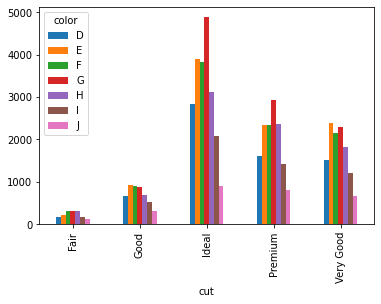

In [39]:
basic_ct = pd.crosstab(diamonds['cut'], diamonds['color'])
basic_ct.plot(kind='bar');

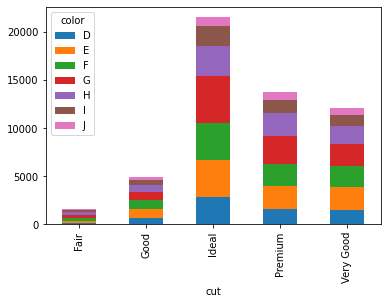

In [40]:
basic_ct.plot(kind='bar', stacked=True);

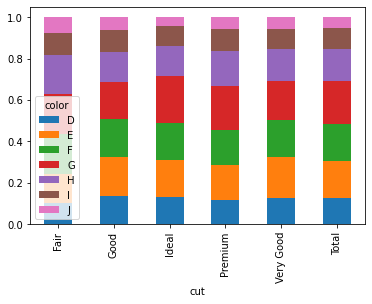

In [41]:
ct.div(ct['Total'], axis=0).iloc[:,:-1].plot(kind='bar', stacked=True);

### numerical vs. a categorical feature

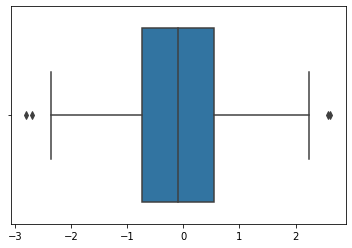

In [42]:
sns.boxplot(r1, orient='v');

In [43]:
r1[1] = 3.5
r1[2] = 3.7
r1[3] = -3

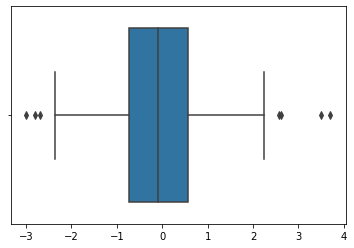

In [44]:
sns.boxplot(r1, orient='v');

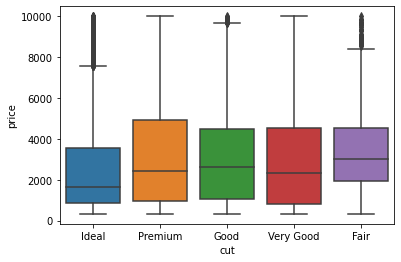

In [45]:
sns.boxplot(x='cut', y='price', data=diamonds.loc[diamonds['price']<10000]);

In [46]:
diamonds.groupby('cut')['price'].agg(np.median).sort_values()

cut
Ideal        1810
Very Good    2648
Good         3054
Premium      3183
Fair         3282
Name: price, dtype: int64

clarity
IF      1080.0
VVS1    1092.5
VVS2    1311.0
VS1     2005.0
VS2     2053.0
SI1     2822.0
I1      3344.0
SI2     4072.0
Name: price, dtype: float64


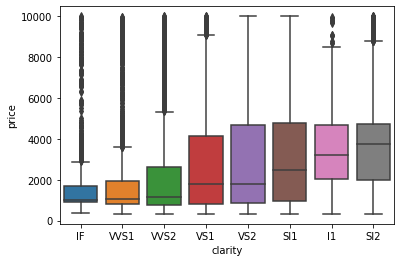

In [47]:
medians_by_clarity = diamonds.groupby('clarity')['price'].agg(np.median).sort_values()
print(medians_by_clarity)
sns.boxplot(x='clarity', y='price', data=diamonds.loc[diamonds['price']<10000],
            order=medians_by_clarity.index);

#  Modeling 

#### Initial model for prediction

In [48]:
w = np.mean(diamonds['price']/diamonds['carat'])
w

4008.0243030180177

In [49]:
def first_ml_model(carat):
    return 4008.024 * carat

In [50]:
carat_values = np.arange(0.5, 5.5, 0.5)
preds = first_ml_model(carat_values)
pd.DataFrame({"Carat": carat_values, "Predicted price":preds})

,Carat,Predicted price
0,0.5,2004.012
1,1.0,4008.024
2,1.5,6012.036
3,2.0,8016.048
4,2.5,10020.060
5,3.0,12024.072
6,3.5,14028.084
7,4.0,16032.096
8,4.5,18036.108
9,5.0,20040.120


### Modeling considerations

#### Train-test split

In [51]:
X = diamonds.drop(['cut','color','clarity','price'], axis=1)
y = diamonds['price']

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=123)

#### Dimensionality reduction using PCA  

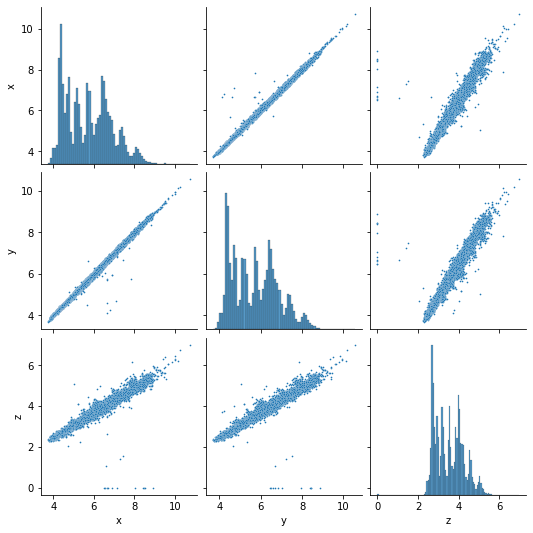

In [53]:
sns.pairplot(X_train[['x','y','z']], plot_kws={"s": 3});

In [54]:
# Import class to use
from sklearn.decomposition import PCA

# Create an instance of the class
pca = PCA(n_components=3, random_state=123)

# Use the fit method of the instance
pca.fit(X_train[['x','y','z']])

# Use the transform method to perform the transformation
princ_comp = pca.transform(X_train[['x','y','z']])

In [55]:
pca.explained_variance_ratio_.round(3)

array([0.996, 0.004, 0.001])

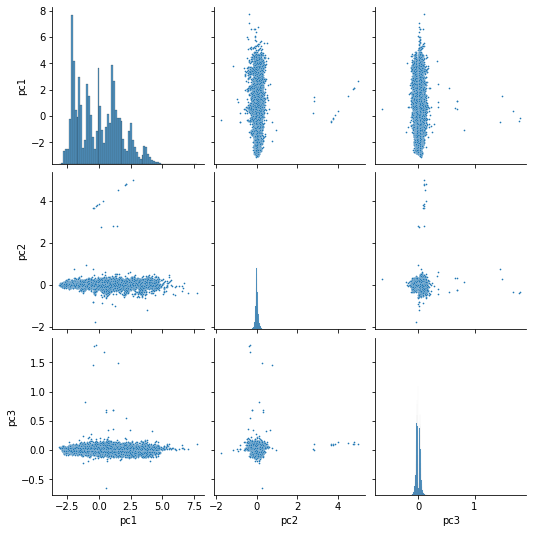

In [56]:
princ_comp = pd.DataFrame(data=princ_comp, columns=['pc1', 'pc2', 'pc3'])
sns.pairplot(princ_comp, plot_kws={"s": 3});

In [57]:
princ_comp.corr().round(4)

,pc1,pc2,pc3
pc1,1.0,0.0,0.0
pc2,0.0,1.0,0.0
pc3,0.0,0.0,1.0


In [58]:
#  Get only the first principal component
pca = PCA(n_components=1, random_state=123)

# Train the pca transformer
pca.fit(X_train[['x','y','z']])

# Add the new feature to the dataset
X_train['dim_index'] = pca.transform(X_train[['x','y','z']]).flatten()

# Drop x, y, and z
X_train.drop(['x','y','z'], axis=1, inplace=True)

#### Standarization: centering and scaling 

In [59]:
numerical_features = ['carat', 'depth', 'table', 'dim_index']

In [60]:
# Import class to use
from sklearn.preprocessing import StandardScaler

# Create an instance of the class
scaler = StandardScaler()

# Use the fit method of the instance
scaler.fit(X_train[numerical_features])

# Use the transform method to perform the transformation
X_train.loc[:, numerical_features] = scaler.transform(X_train[numerical_features])

In [61]:
X_train[numerical_features].head()

,carat,depth,table,dim_index
30066,-0.840293,1.429309,-0.205642,-0.918713
17608,0.677534,0.383359,-2.001069,0.849106
42508,-0.629484,0.034709,-0.205642,-0.568814
22842,0.719696,-0.662591,0.243215,0.909253
25957,2.553737,-1.987460,2.487499,2.148270


In [62]:
X_train[numerical_features].describe().round(4)

,carat,depth,table,dim_index
count,48537.0000,48537.0000,48537.0000,48537.0000
mean,-0.0000,0.0000,-0.0000,0.0000
std,1.0000,1.0000,1.0000,1.0000
min,-1.2619,-13.0745,-6.4896,-1.8153
25%,-0.8403,-0.5231,-0.6545,-0.9077
50%,-0.2079,0.0347,-0.2056,-0.0235
75%,0.5089,0.5228,0.6921,0.7115
max,8.8780,12.0283,9.6692,4.4968


### Multiple Linear Regression

In [63]:
# Import the Estimator to use
from sklearn.linear_model import LinearRegression

# Create an instance of the class
ml_reg = LinearRegression()

# Use the fit method of the instance
ml_reg.fit(X_train, y_train)

# Use the predict method to get the predictions
y_pred_ml_reg = ml_reg.predict(X_train)

In [64]:
pd.Series(ml_reg.coef_, index=X_train.columns).sort_values(ascending=False).round(2)

carat            5369.26
clarity_IF       2691.72
clarity_IF       2691.72
clarity_VVS1     2521.56
clarity_VVS1     2521.56
clarity_VVS2     2496.54
clarity_VVS2     2496.54
clarity_VS1      2310.76
clarity_VS1      2310.76
clarity_VS2      2152.84
clarity_VS2      2152.84
clarity_SI1      1855.04
clarity_SI1      1855.04
clarity_SI2      1377.18
clarity_SI2      1377.18
cut_Ideal         431.86
cut_Ideal         431.86
cut_Very Good     384.32
cut_Very Good     384.32
cut_Premium       383.38
cut_Premium       383.38
cut_Good          310.72
cut_Good          310.72
Unnamed: 0          0.00
table             -56.42
depth             -74.81
color_E          -109.91
color_E          -109.91
color_F          -139.77
color_F          -139.77
color_G          -246.84
color_G          -246.84
color_H          -493.63
color_H          -493.63
color_I          -741.12
color_I          -741.12
dim_index       -1154.00
color_J         -1193.17
color_J         -1193.17
dtype: float64

#### train the model without carat

In [65]:
ml_reg.fit(X_train.drop('carat', axis=1), y_train)
pd.Series(ml_reg.coef_, index=X_train.drop('carat', axis=1).columns).sort_values(ascending=False).round(2)

dim_index        4117.69
clarity_IF       2557.32
clarity_IF       2557.32
clarity_VVS1     2384.74
clarity_VVS1     2384.74
clarity_VVS2     2286.35
clarity_VVS2     2286.35
clarity_VS1      2000.06
clarity_VS1      2000.06
clarity_VS2      1850.38
clarity_VS2      1850.38
clarity_SI1      1488.33
clarity_SI1      1488.33
clarity_SI2      1116.58
clarity_SI2      1116.58
cut_Premium       481.53
cut_Premium       481.53
cut_Ideal         471.77
cut_Ideal         471.77
cut_Very Good     423.43
cut_Very Good     423.43
cut_Good          323.16
cut_Good          323.16
depth             145.85
Unnamed: 0          0.01
table              -1.25
color_E          -110.13
color_E          -110.13
color_F          -182.95
color_F          -182.95
color_G          -254.97
color_G          -254.97
color_H          -402.59
color_H          -402.59
color_I          -562.49
color_I          -562.49
color_J          -947.37
color_J          -947.37
dtype: float64

#### re-training the model with all features again

In [66]:
ml_reg.fit(X_train, y_train)

LinearRegression()

In [67]:
from sklearn.metrics import mean_squared_error
mse_ml_reg = mean_squared_error(y_true=y_train, y_pred=y_pred_ml_reg)
print('{:0.2f}M'.format(mse_ml_reg/1e6))

1.28M


In [68]:
y_pred_null_model = np.full(y_train.shape, y_train.mean())
mse_null_model = mean_squared_error(y_true=y_train, y_pred=y_pred_null_model)
print('{:0.2f}M'.format(mse_null_model/1e6))

15.92M


### Lasso regression

In [69]:
# Import the Estimator model to use
from sklearn.linear_model import Lasso

# Create an instance of the class
lasso = Lasso(alpha=10)

# Use the fit method of the instance
lasso.fit(X_train, y_train)

# Use the predict method to get the predictions
y_pred_lasso = lasso.predict(X_train)

#### Mean Squared Error calculation

In [70]:
mse_lasso = mean_squared_error(y_true=y_train, y_pred=y_pred_lasso)
print('{:0.2f}M'.format(mse_lasso/1e6))

1.52M


In [71]:
pd.Series(lasso.coef_, index=X_train.columns).sort_values(ascending=False).round(2)

carat            4705.78
clarity_VVS2     1059.19
clarity_IF       1001.13
clarity_VVS1      950.15
clarity_VS1       553.23
clarity_VS2       354.46
clarity_IF        344.95
clarity_VS1       312.74
clarity_VS2       265.95
clarity_VVS1      247.84
cut_Ideal         154.98
clarity_VVS2      153.03
cut_Very Good      64.20
cut_Premium        55.74
cut_Very Good      28.35
clarity_SI1        25.41
clarity_SI1        15.54
cut_Ideal          11.19
Unnamed: 0          0.01
cut_Good           -0.00
color_E             0.00
clarity_SI2        -0.00
cut_Good           -0.00
cut_Premium         0.00
color_E             0.00
color_F            -0.00
color_F            -0.00
color_J           -10.01
color_G           -34.48
color_G           -92.35
table            -101.23
color_I          -126.50
depth            -139.59
color_H          -182.88
color_H          -419.68
dim_index        -613.02
clarity_SI2      -750.47
color_I          -874.81
color_J         -1770.82
dtype: float64

### KNN Regression

In [72]:
# Import the Estimator class to use
from sklearn.neighbors import KNeighborsRegressor

# Create an instance of the class
knn = KNeighborsRegressor(n_neighbors=12)

# Use the fit method of the instance
knn.fit(X_train, y_train)

# Use the predict method to get the predictions
y_pred_knn = knn.predict(X_train)

In [73]:
mse_knn = mean_squared_error(y_true=y_train, y_pred=y_pred_knn)
print('{:0.2f}M'.format(mse_knn/1e6))

0.17M


# Evaluation

#### Apply the tranformations

 Replacing x, y, z with dim_index using PCA: notice we are not training, just transforming

In [74]:
X_test['dim_index'] = pca.transform(X_test[['x','y','z']]).flatten()

Remove x, y and z from the dataset

In [75]:
X_test.drop(['x','y','z'], axis=1, inplace=True)

 Scale our numerical features so they have zero mean and a variance of one

In [76]:
X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])

In [77]:
mse = pd.DataFrame(columns=['train', 'test'], index=['MLR','Lasso','KNN'])
model_dict = {'MLR': ml_reg, 'Lasso': lasso, 'KNN': knn}
for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))/1e6 
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))/1e6
    

In [78]:
# mean sqaured error evaluation
mse

,train,test
MLR,1.27672,1.20119
Lasso,1.5171,1.40315
KNN,0.171492,0.172335


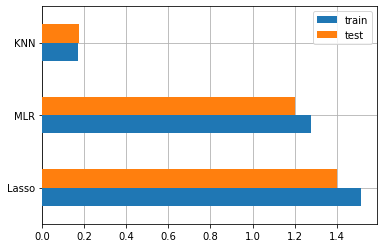

In [79]:
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

In [80]:
demo_pred = X_test.iloc[:10].copy()
pred_dict = {'y_true':y_test[:10]}
for name, model in model_dict.items():
    pred_dict['pred_'+name] = model.predict(demo_pred).round(1)

In [81]:
pd.DataFrame(pred_dict)

,y_true,pred_MLR,pred_Lasso,pred_KNN
8549,4434,4582.4,4925.6,4433.2
27123,17313,15538.5,14965.0,17307.0
40907,1179,1654.6,1675.1,1178.6
1375,2966,2956.4,3168.2,2564.8
41673,1240,1878.6,1592.5,1239.9
35461,901,1683.3,1309.7,900.7
30655,736,1063.6,659.5,736.5
10271,4752,5962.5,5979.7,4751.8
28928,684,859.8,708.5,684.0
26351,645,649.7,585.5,645.0


#### dimensionality reduction

In [82]:

from sklearn.decomposition import PCA
pca = PCA(n_components=1, random_state=123)
diamonds['dim_index'] = pca.fit_transform(diamonds[['x','y','z']])
diamonds.drop(['x','y','z'], axis=1, inplace=True)

### evaluation metrics for regression models

#### Train-test split

In [83]:
X = diamonds.drop(['cut','color','clarity','price'], axis=1)
y = diamonds['price']

In [84]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

#### standarization: centering and scaling 

In [85]:
numerical_features = ['carat', 'depth', 'table', 'dim_index']
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train.loc[:, numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])

#### build a simple multiple regression model

In [86]:
from sklearn.linear_model import LinearRegression
ml_reg = LinearRegression()
ml_reg.fit(X_train, y_train)
y_pred = ml_reg.predict(X_test)

### Root Mean Squared Error

In [87]:
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(y_true=y_test, y_pred=y_pred)**0.5
print("RMSE: {:,.2f}".format(rmse))

RMSE: 1,084.20


### Mean Absolute Error

In [88]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_true=y_test, y_pred=y_pred)
print("MAE: {:,.2f}".format(mae))

MAE: 735.60


### R-squared (R<sup>2</sup>)

In [89]:
from sklearn.metrics import r2_score
r2 = r2_score(y_true=y_test, y_pred=y_pred)
print("R-squared: {:,.2f}".format(r2))

R-squared: 0.92


In [90]:
eval_df = pd.DataFrame({"y_true": y_test, "y_pred": y_pred, "residuals": y_test - y_pred})

### Visualization methods for evaluating regression models

### distributions of residuals

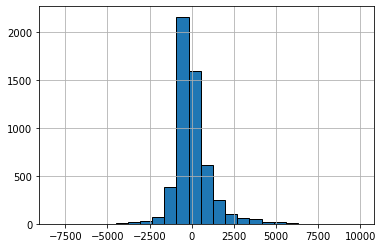

In [91]:
eval_df["residuals"].hist(bins=25, ec='k');

In [92]:
(eval_df["residuals"] <=0).mean()

0.5898386797700723

### observed vs. predicted values plot

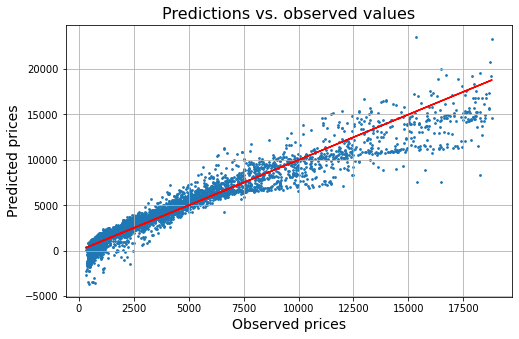

In [93]:
fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(eval_df["y_true"], eval_df["y_pred"], s=3)
ax.plot(eval_df["y_true"], eval_df["y_true"], color='red')
ax.set_title('Predictions vs. observed values', fontsize=16)
ax.set_xlabel('Observed prices', fontsize=14)
ax.set_ylabel('Predicted prices', fontsize=14)
ax.grid();

In [94]:
eval_df["y_pred"].loc[eval_df["y_pred"]<0][:5]

39299   -302.901862
29808   -162.823939
31615   -313.477791
2714    -687.644660
5045    -711.798465
Name: y_pred, dtype: float64

### predicted values vs. residuals

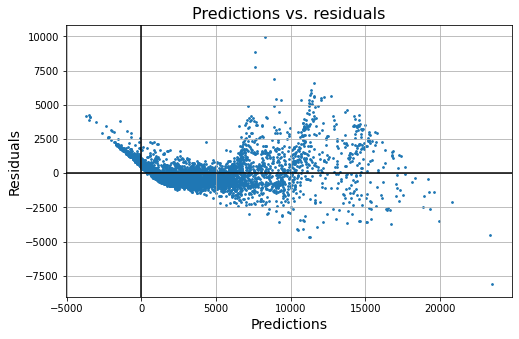

In [95]:
fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(eval_df["y_pred"], eval_df["residuals"], s=3)
ax.set_title('Predictions vs. residuals', fontsize=16)
ax.set_xlabel('Predictions', fontsize=14)
ax.set_ylabel('Residuals', fontsize=14)
ax.axhline(color='k'); ax.axvline(color='k');
ax.grid();

### K-fold cross validation for model evaluation

 Train-test split

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=2)

 Standardize the numeric features 

In [97]:
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train.loc[:, numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])

 Model training

In [98]:
ml_reg = LinearRegression()
ml_reg.fit(X_train, y_train)

LinearRegression()

 Get predictions

In [99]:
y_pred = ml_reg.predict(X_test)

 Evaluate the model using the same metric

In [100]:
mae = mean_absolute_error(y_true=y_test, y_pred=y_pred)
print("MAE: {:,.2f}".format(mae))

MAE: 729.49


In [101]:
from sklearn.model_selection import cross_validate, RepeatedKFold

 Scale the whole dataset

In [102]:
scaler = StandardScaler()
scaler.fit(X[numerical_features])
X.loc[:, numerical_features] = scaler.fit_transform(X[numerical_features])

 10-fold cv

In [103]:
ml_reg = LinearRegression()
cv_results = cross_validate(ml_reg, X, y, scoring='neg_mean_absolute_error', cv=10)
scores = -1*cv_results['test_score']
scores

array([ 700.00490546,  638.40396746,  680.53664129,  963.60817567,
       2035.9415046 ,  892.62721992,  535.23792874,  624.50169502,
        681.50550079,  824.69678969])

In [104]:
scores.mean()

857.7064328631074